In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip', compression='zip')

In [16]:
df.shape

(50000, 8)

In [17]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [39]:
#функция для подсчета расстояния между пунктами отправления и прибытия на поверхности Земли

def haversine(lat_1, lat_2, long_1, long_2, radius=6371):
    lat_1, lat_2, long_1, long_2 = map(np.radians, [lat_1, lat_2, long_1, long_2])
    diff_lat = lat_2 - lat_1
    diff_long = long_2 - long_1
    d = 2 * radius * np.arcsin(np.sqrt((np.sin(diff_lat/2))**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_long/2)**2))
    return d

%timeit haversine

15.3 ns ± 0.217 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [40]:
%%time

#запустим функцию при помощи метода iterrows и замерим время выполнения
dists = [ ]
for i, row in df.iterrows():
    dists.append(haversine(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude']))
df['distance'] = dists

CPU times: total: 2.06 s
Wall time: 2.07 s


In [41]:
%%time

#сделаем то же самое при помощи метода itertuples
dists = [ ]
for row in df.itertuples():
    dists.append(haversine(row.pickup_latitude, row.dropoff_latitude, row.pickup_longitude, row.dropoff_longitude))
df['distance'] = dists

CPU times: total: 500 ms
Wall time: 504 ms


In [42]:
%%time

#а теперь при помощи apply
df['distance'] = df[['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

CPU times: total: 922 ms
Wall time: 924 ms


In [43]:
%%time

#сделаем то же самое посредством векторизации
df['distance'] = haversine(df['pickup_latitude'], df['dropoff_latitude'], df['pickup_longitude'], df['dropoff_longitude'])

CPU times: total: 15.6 ms
Wall time: 8.97 ms


In [44]:
%%time

#повторим предыдущую команду, ограничив вывод колонки Series значениями values
df['distance'] = haversine(df['pickup_latitude'].values, df['dropoff_latitude'].values, df['pickup_longitude'].values, df['dropoff_longitude'].values)

CPU times: total: 0 ns
Wall time: 4.98 ms


In [59]:
#посмотрим, в скольки поездках вместо координат пункта назначения стоят нули
df.query('(dropoff_latitude == 0) | (dropoff_longitude == 0)').shape

(958, 9)

C:\Users\bkunt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dropoff_latitude'>

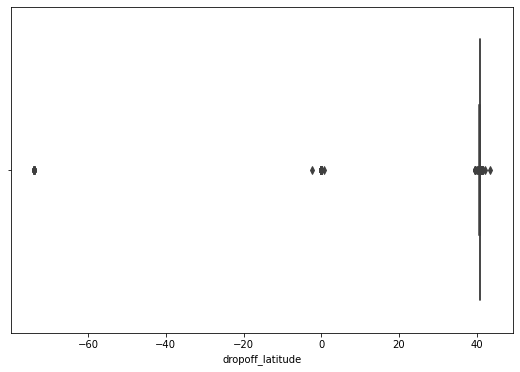

In [77]:
#построим графики распределения переменной dropoff_longitude
plt.figure(figsize=(9, 6))
sns.boxplot(df['dropoff_latitude'])

In [79]:
#отфильтруем данные по выбранным критериям и установим лимит на дальность поездки в 50 км
filtered_df = df.query('10 < pickup_latitude < 120') \
              .query('pickup_longitude < -60') \
              .query('10 < dropoff_latitude') \
              .query('dropoff_longitude < -60') \
              .query('distance < 50')

In [90]:
#найдем наибольшую сумму, которую заплатили за поездку
filtered_df.loc[filtered_df['distance'].idxmax()]

key                  2014-02-22 02:44:00.00000052
fare_amount                                 136.0
pickup_datetime           2014-02-22 02:44:00 UTC
pickup_longitude                        -73.98954
pickup_latitude                         40.757032
dropoff_longitude                       -73.86058
dropoff_latitude                        41.147487
passenger_count                                 1
distance                                44.746988
Name: 33502, dtype: object